In [1]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## 1. Read the data and Descriptive analysis:

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people)(Centers for Disease Control and Prevention,2021). I hope to use the data and statistical knowledge to learn the indicators of heart disease and find the best model to predict/judge whether the people have the heart disease.

Originally, the dataset comes from the CDC in 2020 and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. In this project, I will use the kaggle data from Kamil Pylak and the dataset contains the most relevant variables from the original one and was cleaned roughly. 

In [2]:
heart = pd.read_csv("heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

From the result, we see that there are about 18 features in our dataset and there are 4 numerical features and 14 logistic features. Also, there is no missing data and we have 319795 objects.
Then, we see the detailed information of the features.

In [4]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
heart.iloc[:,np.r_[0,2:5,7:14,15:18]].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [6]:
for feature in heart.iloc[:,np.r_[0,2:18]].columns:
    print(feature)
    print(heart[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 

KidneyDisease
['No' 'Yes'] 

SkinCancer
['Yes' 

## 2. Preprocessing Data
First of all, we change the contains of each unnumerical features into numbers for the further regression and predictive models.

In [10]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
heart["HeartDisease"]= label_encoder.fit_transform(heart["HeartDisease"])
heart["Smoking"]= label_encoder.fit_transform(heart["Smoking"])
heart["AlcoholDrinking"]= label_encoder.fit_transform(heart["AlcoholDrinking"])
heart["Stroke"]= label_encoder.fit_transform(heart["Stroke"])
heart["DiffWalking"]= label_encoder.fit_transform(heart["DiffWalking"])
heart["Sex"]= label_encoder.fit_transform(heart["Sex"])
heart["AgeCategory"]= label_encoder.fit_transform(heart["AgeCategory"])
heart["Race"]= label_encoder.fit_transform(heart["Race"])
heart["Diabetic"]= label_encoder.fit_transform(heart["Diabetic"])
heart["PhysicalActivity"]= label_encoder.fit_transform(heart["PhysicalActivity"])
heart["GenHealth"]= label_encoder.fit_transform(heart["GenHealth"])
heart["Asthma"]= label_encoder.fit_transform(heart["Asthma"])
heart["KidneyDisease"]= label_encoder.fit_transform(heart["KidneyDisease"])
heart["SkinCancer"]= label_encoder.fit_transform(heart["SkinCancer"])


In [11]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


We saw the proportion of heart disease people in our objects.

Text(0.5, 0.98, 'Pie Plot about HeartDisease')

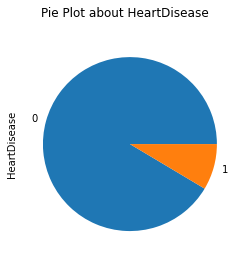

In [12]:
heart.groupby('HeartDisease').HeartDisease.count().plot(kind= 'pie')
plt.suptitle('Pie Plot about HeartDisease')

We can see that that the number of people with heart disease（1） is much smaller than the healthy ones（0）, so it may exits unbalance problem when we study our data set. Therefore, we need to use undersampling methods to resample our dataset.

In [13]:
X, y = heart.loc[:, heart.columns != 'HeartDisease'], heart['HeartDisease']
ncr = RandomUnderSampler(sampling_strategy=0.5)
X_ncr, y_ncr =ncr.fit_resample(X,y)

In [14]:
X_ncr.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,32.86,1,0,0,0.0,5.0,0,1,2,5,0,1,0,7.0,0,0,0
1,25.84,0,0,0,0.0,0.0,0,1,6,2,0,1,0,7.0,0,0,0
2,23.49,0,0,0,0.0,10.0,0,1,3,1,0,1,4,6.0,0,0,0
3,34.75,1,1,0,0.0,15.0,0,0,3,4,0,1,2,8.0,1,0,0
4,37.12,1,0,0,0.0,0.0,0,0,5,5,0,0,4,7.0,0,0,0


Text(0.5, 0.98, 'Pie Plot about HeartDisease')

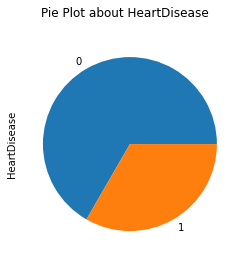

In [15]:
y_ncr.groupby(y_ncr).count().plot(kind= 'pie')
plt.suptitle('Pie Plot about HeartDisease')

In [16]:
print(f'After undersampling: {Counter(y_ncr)}')

After undersampling: Counter({0: 54746, 1: 27373})


In [17]:
X_train, X_test,y_train,y_test = train_test_split(X_ncr,y_ncr,test_size=0.40,random_state=42)

## 3. Data Visualization

Firstly, we need to show the relationship between the features which we want to learn. 

<AxesSubplot:>

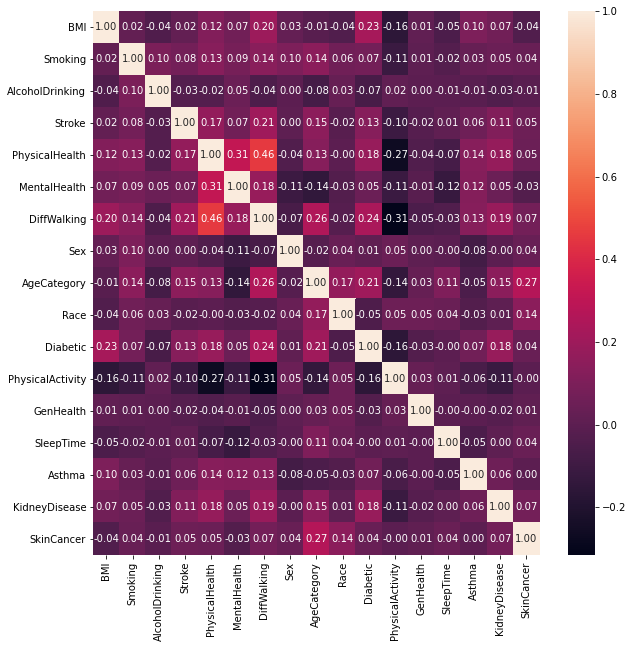

In [18]:
fig = plt.subplots(figsize = (10,10))
sns.heatmap(X_ncr.corr(), annot = True, fmt = '.2f')

From the heatmap of the features, we can learn that the correlations between them are small, so they can be seen as indenpent variables and there is no multi-correlation problem in our dataset.

According to different type of features, we use different ways to show the relationship between each variable and heartdisease. We hope to use the visualization methods to find the indicators of heart disease.

### 3.1Binary Features & Heartdisease
For the binary features, we hope to use the pie-chart to show the distribution of these features in different group of people(have heartdisease or not have). We hope to learn whether there is huge difference between them. 

In [19]:
# Create the function to visualize to pie chart
def Draw_pie_chart(name_feature):


    fig,axes = plt.subplots(1,2)
    labels = X_ncr[name_feature].unique()

    axes[0].pie(X_ncr[y_ncr == 0][name_feature].value_counts(), labels = labels)
    axes[0].set_title('No Heart Disease')
    axes[1].pie(X_ncr[y_ncr == 1][name_feature].value_counts(), labels = labels)
    axes[1].set_title('Yes Heart Disease')

    plt.legend(title = name_feature)
    plt.show()


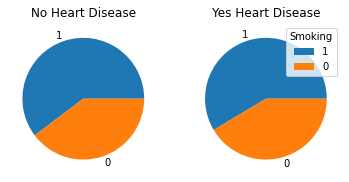

In [20]:
Draw_pie_chart("Smoking")

There is no big difference between these two plot and there may be a low relationship between the smoking habit and heart disease.

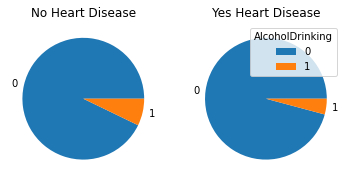

In [21]:
Draw_pie_chart("AlcoholDrinking")

That's an interesting finding that the people without heartdisease are more like to have alcohol-drinking. But it does not mean that the alcohol drinking is good for heart health because the heart diseases may be a reason that stops people from drinking alcohol and we need to do more research to learn the causal relationship between them. 

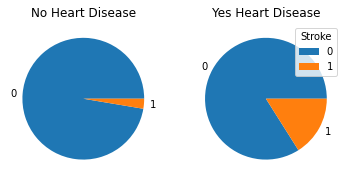

In [22]:
Draw_pie_chart("Stroke")

There is a huge difference between the possibility of stroke, we can see that the heart-disease people are more likely to have a stroke.

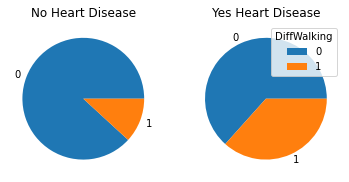

In [23]:
Draw_pie_chart("DiffWalking")

There is a huge difference between the possibility of stroke, we can see that the heart-disease people are more likely to have difficulty in walking.

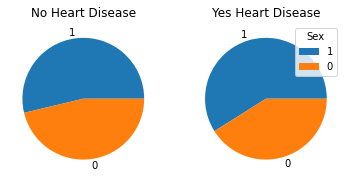

In [24]:
Draw_pie_chart("Sex")

The female proportion of heartdisease patient is larger than the male. It is possible that women more prone to heart disease.

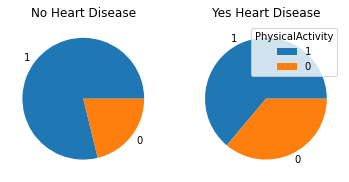

In [41]:
Draw_pie_chart("PhysicalActivity")

More heartdisease people do less physical activities than healthy people.

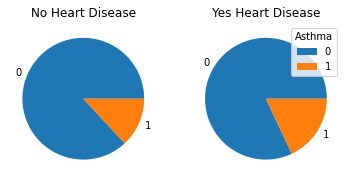

In [44]:
Draw_pie_chart("Asthma")

People with heart disease are more likely to have asthma than people without heart disease.

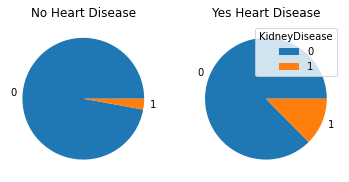

In [45]:
Draw_pie_chart("KidneyDisease")

More heart disease people have kidney disease than no heart disease people.

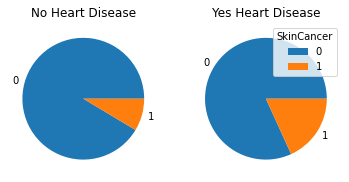

In [46]:
Draw_pie_chart("SkinCancer")

Compared with people without heart disease, heart disease people are more likely have skin cancer.

From the above pie-charts, we can learn that the heart disease patients are more likely to have skin cancer, kidney disease, asthma, walking difficulty, and stroke than people with health heart. Therefore, there are some relationships between the other diseases and heart diseases.

### 3.2 Discrete Features

For discrete features, we use the histgram and density plot to show the distribution of features and control the condition of heart disease people and no heart disease people. The reason we use the density plot is that the number of heart disease people and no heart disease people is not equal. The density plot shows the propostion of each features so that we do not need to worry about the population effects.

In [37]:
DiscreteOnes = heart.iloc[:,np.r_[5,6,9,10,11,13]]
DiscreteOnes.head()
discrete_feature = list(DiscreteOnes.columns)
discrete_feature

['PhysicalHealth',
 'MentalHealth',
 'AgeCategory',
 'Race',
 'Diabetic',
 'GenHealth']

/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

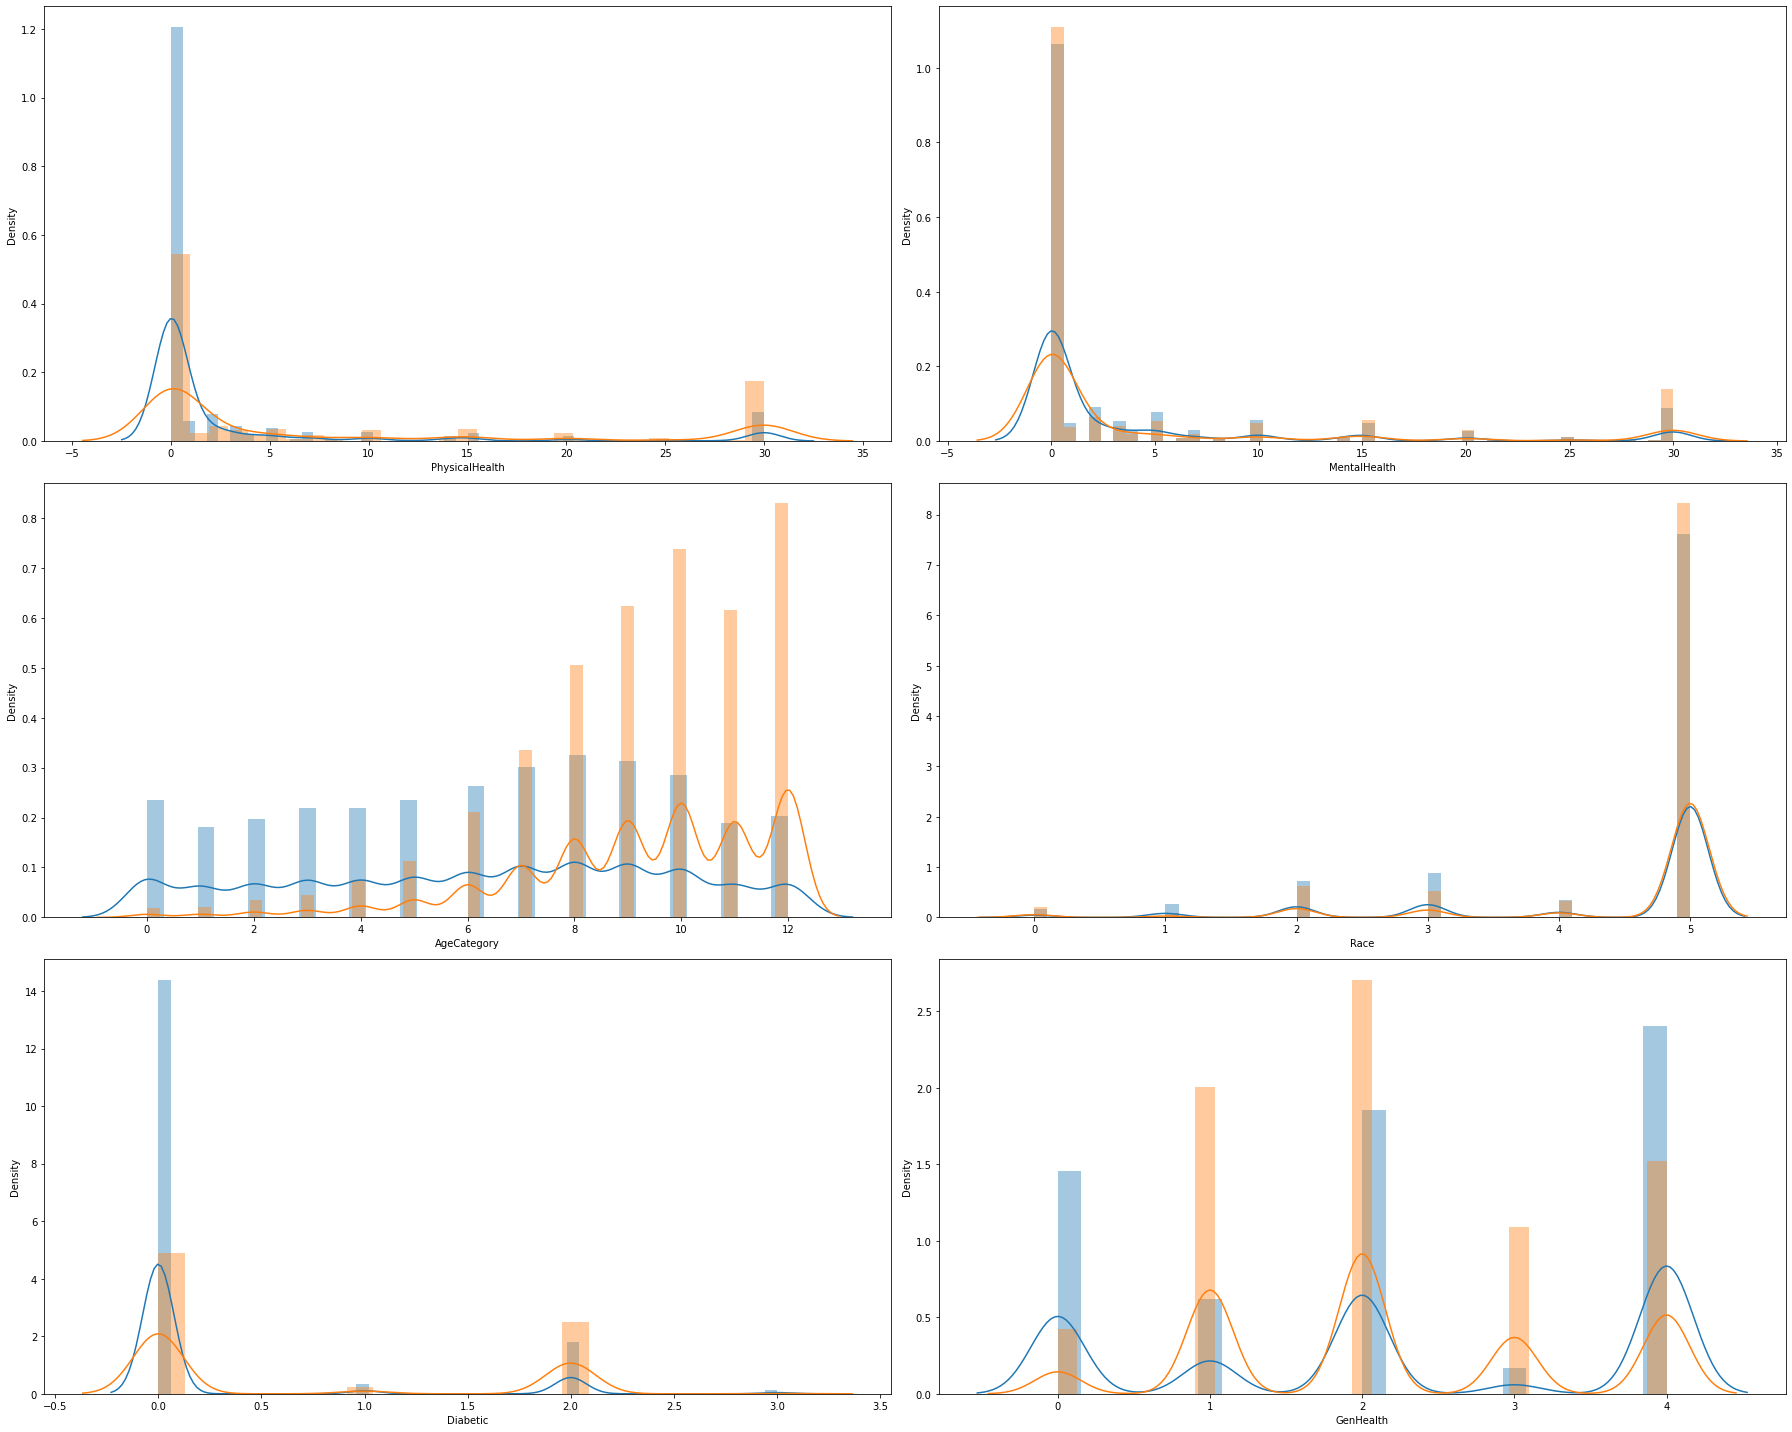

In [38]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(25,20))
subset0 = X_ncr[y_ncr == 0]
subset1 = X_ncr[y_ncr == 1]


for position, feature in zip(position_index, discrete_feature):
    
    sns.distplot(subset0[feature], ax=axes[position],hist = True, kde = True,label = "no heart disease")
    sns.distplot(subset1[feature], ax=axes[position],hist = True, kde = True,label = "heart disease")

#    sns.displot(subset0[feature],label = "no heart disease")
#    sns.displot(data=subset0, x=feature, kde=True)
    
   # sns.distplot(subset0["SleepTime"], hist = False, kde = True, label = "no heart disease")


        
fig.tight_layout()
plt.show()


By comparing the distribution of each discrete features, we learned that the heart disease is not related to race, mental health and physical health. The heart disease is more realted to age, gen-health and diabetic situation. With the age growth, people are more likely to have heart problems. From the last plot, we can see that people with not very good genhealth(1-Fair, 2-Good, 3-poor) have high risk to have heart disease.  What's more, there is more possible for people with diabetic(2-yes) to have heart disease. 

### 3.3 Continous Features

Finally, for BMI feature, we use the kernel density estimate (KDE) plot, a method for visualizing the distribution of observations in a dataset, to show the distribution of the BMI of two group people. From the following plot, we can see that the sharp of the distribution of two group data is similar and they are centered in the similar place. Variance of healthy heart people BMI is smaller than heart disease one.

<AxesSubplot:xlabel='BMI', ylabel='Density'>

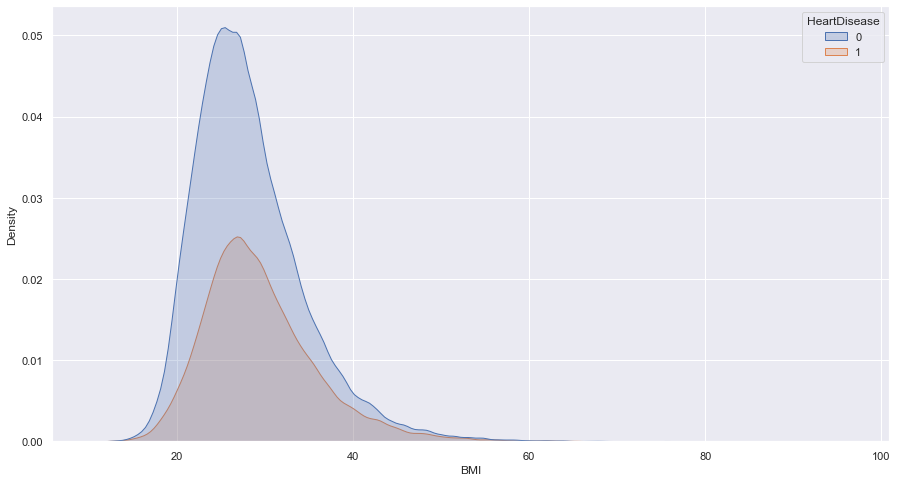

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.kdeplot(data=X_ncr, x="BMI", hue=y_ncr, fill=True,bw_adjust=.8)

After that, we use the density plot to compare the distribution of the sleepintime for heartdisease and no-heartdisease people. From the following plot, we can see that the whole shapes of two lines are similar, but people without heart disease are more likely to sleep 6-8 hours than heart disease people.

/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Plot of Sleeping Time')

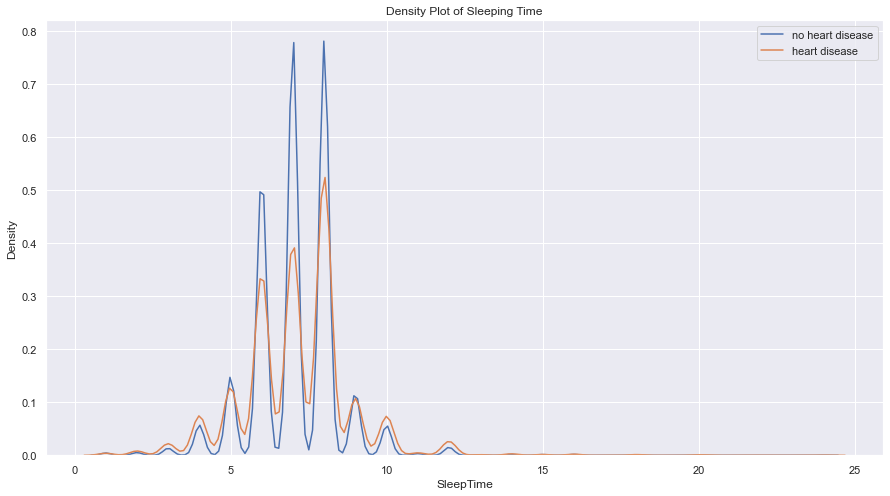

In [40]:
#sns.countplot(x = "SleepTime", data = X_ncr, hue=y_ncr)
subset0 = X_ncr[y_ncr == 0]
sns.distplot(subset0["SleepTime"], hist = False, kde = True, label = "no heart disease")
subset1 = X_ncr[y_ncr == 1]
sns.distplot(subset1["SleepTime"], hist = False, kde = True, label = "heart disease")
plt.legend()
plt.title("Density Plot of Sleeping Time")

## 4. Statistical Analysis

From the former visualization of two group people( have heartdisease or not have), we can see that there is differences between them. To confirm that we can cluster two group of people using our dataset, we use the manova test to show the result. We set the null hypothesis testing as there is no difference between two group people.

In [41]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('BMI+Smoking + AlcoholDrinking + Stroke + PhysicalHealth + MentalHealth + DiffWalking + Sex + AgeCategory + Race + Diabetic + PhysicalActivity + GenHealth + SleepTime + Asthma + KidneyDisease + SkinCancer ~ HeartDisease', data=heart)
print(fit.mv_test())

                       Multivariate linear model
                                                                       
-----------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF     F Value    Pr > F
-----------------------------------------------------------------------
          Wilks' lambda  0.0151 17.0000 319777.0000 1224129.0708 0.0000
         Pillai's trace  0.9849 17.0000 319777.0000 1224129.0708 0.0000
 Hotelling-Lawley trace 65.0772 17.0000 319777.0000 1224129.0708 0.0000
    Roy's greatest root 65.0772 17.0000 319777.0000 1224129.0708 0.0000
-----------------------------------------------------------------------
                                                                       
-----------------------------------------------------------------------
          HeartDisease      Value   Num DF    Den DF    F Value  Pr > F
-----------------------------------------------------------------------
              W

From the results of wilks' lambda, Pillai's trace, Hotelling-Lawley trace and Roy's greatest root test, we can clearly see that all the p-values is closed to 0 and smaller than 0.05. Therefore, we reject our null hypothesis and there is large difference between two groups and we can do clustering in next step.

## 5. Predictive Analysis

In the final part of report, we hope to find out the best machine learning model to judge/predict whether people have heart disease. In our experiment, we compare decision tree, random forest, knn and logistic regression algorithm. For decision tree, random forest and knn algorithms, we use the randomized search cross-validation to find the variables which makes the model fits our datasets well. Finally, we use the ROC curve to find out the best predictive models.

### 5.1 Decision Tree

In [42]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6}
Best score is 0.7404356223902976


In [43]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 4, min_samples_leaf = 6)
clf.fit(X_test, y_test)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19621  2304]
 [ 3859  7064]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     21925
           1       0.75      0.65      0.70     10923

    accuracy                           0.81     32848
   macro avg       0.79      0.77      0.78     32848
weighted avg       0.81      0.81      0.81     32848



In [44]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)


The accuracy of the best decision tree to test data set is 0.81. 

### 5.2 Random Forest 

In [46]:
#grid search
from sklearn.ensemble import RandomForestClassifier
parameters = {  
    'n_estimators': [24,28,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (5,10,15),     
    'criterion'   : ['gini', 'entropy'],
}
RandomForest = RandomForestClassifier()
RandomForestgridsearch = RandomizedSearchCV(RandomForest,     
                          parameters, 
                          cv = 2,    
                         )
RandomForestgridsearch.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(RandomForestgridsearch.best_params_))
print("Best score is {}".format(RandomForestgridsearch.best_score_))




Tuned Decision Tree Parameters: {'n_estimators': 32, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Best score is 0.770290884023153


In [47]:
RandomForestnew = RandomForestClassifier(n_estimators = 32, max_features = 'log2', max_depth = 10, criterion = 'entropy')
RandomForestnew.fit(X_test, y_test)
y_pred = RandomForestnew.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19417  2508]
 [ 4142  6781]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     21925
           1       0.73      0.62      0.67     10923

    accuracy                           0.80     32848
   macro avg       0.78      0.75      0.76     32848
weighted avg       0.79      0.80      0.79     32848



In [48]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RandomForestnew.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob)


The accuracy of the best random forest to test data set is 0.798. 

### 5.3 KNN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {  
    'n_neighbors': np.arange(1, 9)
}
knn = KNeighborsClassifier()
KNNgridsearch = RandomizedSearchCV(knn,     
                          parameters, 
                          cv = 10,    
                         )
KNNgridsearch.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(KNNgridsearch.best_params_))
print("Best score is {}".format(KNNgridsearch.best_score_))



/Users/xifangle/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Decision Tree Parameters: {'n_neighbors': 7}
Best score is 0.7292524428078517


In [53]:
KNNnew = KNeighborsClassifier(n_neighbors = 7)
KNNnew.fit(X_test, y_test)
y_pred = KNNnew.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19261  2664]
 [ 4048  6875]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     21925
           1       0.72      0.63      0.67     10923

    accuracy                           0.80     32848
   macro avg       0.77      0.75      0.76     32848
weighted avg       0.79      0.80      0.79     32848



In [64]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = KNNnew.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob)


In [54]:
(19261+6875)/(19261+2664+4048+6875)

0.7956648806624452

The accuracy of the best random forest to test data set is 0.795. 

### 5.4 Logistic Regression

In [61]:
logreg = LogisticRegression(max_iter = 500, class_weight = "balanced")

# Fit it to the training data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

[[16208  5717]
 [ 2585  8338]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80     21925
           1       0.59      0.76      0.67     10923

    accuracy                           0.75     32848
   macro avg       0.73      0.75      0.73     32848
weighted avg       0.77      0.75      0.75     32848

Test set score: 0.747


In [63]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob)


In [62]:
print(logreg.coef_, logreg.intercept_)


[[ 0.01679237  0.45418712 -0.23829998  1.36180183  0.02622786  0.01488131
   0.42984587  0.78669788  0.30724455  0.02102062  0.31907245 -0.09733845
  -0.03626756 -0.02816172  0.38610094  0.70161482  0.13172801]] [-3.96872473]


In [66]:
X_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
26687,25.77,0,0,0,0.0,4.0,0,1,2,5,0,0,2,6.0,0,0,0
10054,41.28,0,0,0,5.0,15.0,1,1,8,5,0,1,4,6.0,0,0,0
8514,21.71,0,0,0,0.0,0.0,0,1,7,5,0,1,0,7.0,0,0,0
45912,32.28,1,0,0,0.0,30.0,1,0,5,3,0,1,2,7.0,1,0,0
62779,37.76,0,0,0,0.0,0.0,1,0,9,5,0,1,4,6.0,0,0,1


From the coefficent of logistic regression model, we can see that the judgement of heartdisease is more related with Smoking, Stroke, DiffWalking, gender, Asthma and KidneyDisease.

### 5.5 Comparison

Using the ROC Curve plot, we can compare the four popular machine learning algorithm on this dataset. The larger down-right area means the better algorithm. 

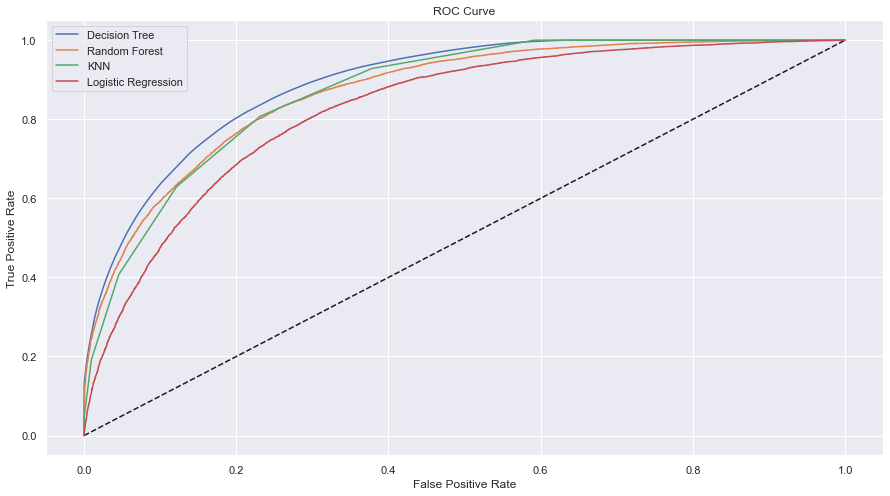

In [67]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label = "Decision Tree")
plt.plot(fpr2, tpr2, label = "Random Forest")
plt.plot(fpr3, tpr3, label = "KNN")
plt.plot(fpr4, tpr4, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

From the following plot, we can see that the decision tree is the best predictive machine learning algorithm. 

## 6. Conclusion & Discussion

#### For the indicators of heart disease
In our research, we use different visualization methods to show the relationship between heart disease and other 17 features. By conbining the result with the logistic regression coefficients, we can clearly see that the heart disease is highly related to other different kinds of disease, like skin cancer, stroke, difficult-walking, asthma and kidney disease. Therefore, we advice people with related medical conditions to do heart screening.

#### For model selection and usage

In the last research part, we use the ROC curve to compare four machine learning algorithms, decision tree, random forest, KNN and logistic regression.

Although, for this dataset, the decision tree model has the highest accuracy, the decision tree model is not stable. What's more, the depth of the decision tree model is too large, so it is unreadable and difficult to be explained. Therefore, in practice, we can use the logistic regression model to explain the relationship between the target variable, having heart disease or not, and the features, and we can use the decision tree model to do the prediction.

## 7.Reference

KAMIL PYTLAK (2022, Feb 16). Personal Key Indicators of Heart Disease.Retrieved April 27, 2022, from
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Centers for Disease Control and Prevention.(2021, September 27). About heart disease.Centers for Disease Control and Prevention.Retrieved April 27, 2022, from https://www.cdc.gov/heartdisease/about.htm

WE ARE FISH BUT WE CAN FLY, (2022, April 11). Heart Disease Data Understanding. Retrieved April 27, 2022, from https://www.kaggle.com/code/hiiammrcat/heart-disease-data-understanding

SAKSHI,(2022, April 10). Heart Disease Indicators:ML Algorithms Comparison.Retrieved April 27, 2022, from https://www.kaggle.com/code/gladerunner/heart-disease-indicators-ml-algorithms-comparison/notebook

Datacamp.Supervised Learning with scikit-learn. Retrieved April 27, 2022, from https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn
